<a href="https://colab.research.google.com/github/devsankar8016/AlmaBetter-Google-Play-Store-EDA-Project/blob/main/Google_Play_Store_App_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Google Play Store App Review]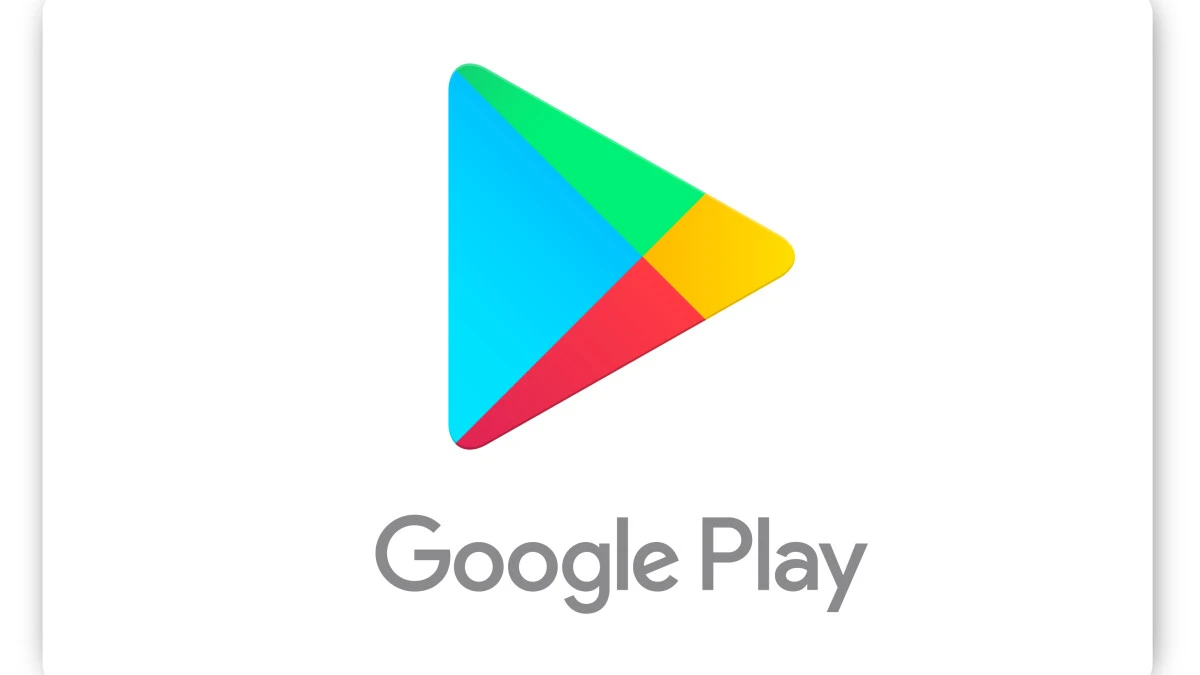**

# **Project Type - EDA of Play Store App Review**
# **Contribution - Devsankar Maity**

# **Project Summary -**

*# ‚ñ∂**Project Summary**
In this project of analyzing play store applications, we have worked on several parameters which would help AlmaBetter to do well in launching their apps on the play store.

In the initial phase, we focused more on the problem statements and data cleaning, in order to ensure that we give them the best results out of our analysis.

Google needs to focus more on:
1. Developing apps related to the least categories as they are not explored much. Like events and beauty.
2. Most of the apps are Free, so focusing on free app is more important.
3. Focusing more on content available for Everyone will increase the chances of getting the highest installs.
4. They need to focus on updating their apps regularly, so that it will attract more users.
5. They need to keep in mind that the sentiments of the user keep varying as they keep using the app, so they should focus more on users needs and features.

* Percentage of free apps = ~92%
* Percentage of apps with no age restrictions = ~82%
* Most competitive category: Family
* Category with the highest average app installs: Game
* Percentage of apps that are top rated = ~80%
* Family, Game and Tools are top three categories having 1906, 926 and 829 app count.
* Tools, Entertainment, Education, Buisness and Medical are top Genres.
* 8783 Apps are having size less than 50 MB. 7749 Apps are having rating more than 4.0 including both type of apps.
* There are 20 free apps that have been installed over a billion times.
* Minecraft is the only app in the paid category with over 10M installs. This app has also produced the most revenue only from the installation fee.
* Category in which the paid apps have the highest average installation fee: Finance
* The median size of all apps in the play store is 12 MB.
* The apps whose size varies with device has the highest number average app installs.
* The apps whose size is greater than 90 MB has the highest number of average user reviews, ie, they are more popular than the rest.
* Helix Jump has the highest number of positive reviews and Angry Birds Classic has the highest number of negative reviews.
* Overall sentiment count of merged dataset in which Positive sentiment count is 64%, Negative 22% and Neutral 13%.

# **Github Links -**

# **Problem Statement** -

1. Our major challenge was data cleaning.
2. 13.60% of reviews were NaN values, and even after merging both the dataframes, we could not infer much in order to fill them. Thus we had to drop them.
3. The merged data frame of both play store and user reviews, had only 816 common apps. This is just 10% of the cleaned data, we could have given more valuable analysis, if we had atleast 70% - 80% of the data available in the merged dataframes.
4. User Reviews had 42% of NaN values, which could have been used for developing an understanding of the category wise sentiments, which would help us to fill 13.60% NaN values of the Reviews column.




# **Import Libaries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Dataset Loading**

In [97]:
play_store_df=pd.read_csv("/content/drive/MyDrive/ALMABETTER EDA CAPSTONE PROJECT PLAY STORE APP REVIEW ANALYSIS/Play Store Data.csv")
user_review_df=pd.read_csv("/content/drive/MyDrive/ALMABETTER EDA CAPSTONE PROJECT PLAY STORE APP REVIEW ANALYSIS/User Reviews.csv")

# **Dataset First View**

In [98]:
play_store_df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [99]:
user_review_df.head()

App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000

# **Dataset Rows and Columns**

In [100]:
play_store_df.shape

(10841, 13)

In [101]:
user_review_df.shape

(64295, 5)

# **Dataset Information**

In [102]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


üìã To get a list of all the column names in the automobile dataset, you can use the command **play_store_df.columns**. This would provide you with the names of all the columns in the dataset and enable you to carry out various data manipulation and analysis operations.

In [103]:
user_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


# **just check Is There is any Null Value present or not in this play_store_df dataset ??**

In [104]:
play_store_df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [105]:
user_review_df.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

üìã To get a list of all the column names in the automobile dataset, you can use the command **user_review_df.columns**. This would provide you with the names of all the columns in the dataset and enable you to carry out various data manipulation and analysis operations.

# **Duplicate Values**

In [106]:
play_store_df.duplicated().sum()

483

In [107]:
user_review_df.duplicated().sum()

33616

# **Missing Values Counts And Visualizing**

In [108]:
play_store_df.isna().sum()


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [109]:
play_store_df.isna().any()

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

In [110]:
user_review_df.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [111]:
user_review_df.isna().any()

App                       False
Translated_Review          True
Sentiment                  True
Sentiment_Polarity         True
Sentiment_Subjectivity     True
dtype: bool

# **Dataset Describe**

In [112]:
play_store_df.describe()

Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000

In [113]:
user_review_df.describe()

Sentiment_Polarity  Sentiment_Subjectivity
count        37432.000000            37432.000000
mean             0.182146                0.492704
std              0.351301                0.259949
min             -1.000000                0.000000
25%              0.000000                0.357143
50%              0.150000                0.514286
75%              0.400000                0.650000
max              1.000000                1.000000

# **Columns present in these datasets.**

In [114]:
play_store_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [115]:
user_review_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

# **Datasets Description **
# Here is the datasets that will be using:

https://drive.google.com/file/d/1pVZNhpwbqbu3xLf6J-1KrQI_-B8KqDCt/view?usp=drive_link
https://drive.google.com/file/d/1zJmyrNtkv_ZnVAY1wtg1irTRbpoZ9rRH/view?usp=drive_link

We can find the data source and details here. The dataset consists of 2 tables. The first table called ‚ÄòPlay Store Data.csv‚Äô consists of 13 columns ( app, category, rating, reviews, size, installs, type, price, content rating, genres). Meanwhile, the second table called ‚Äògoogleplaystore_User_Reviews.csv‚Äô consists of 5 columns (app, translated review, sentiment, sentiment polarity, sentiment subjectivity).



**Here is information on what columns represent in Play store Data :**

**App** - Indivisual name of the applications.

**Category** - Category of each applications that available in play store.

**Rating** - Play Store ratings for apps showing the proportional number of 1-5 star reviews, are calculated based on the app's current quality ratings from user reviews, rather than the lifetime average value of user reviews, unless the app has very few ratings.

**Reviews** - App reviews are the individual comments users can leave under an app.

**Size** - The amount of space required to install your app.

**Installs** -  The number of times the app was installed from the store regardless to any events in the past.

**Type** - Type is basically represent either the app is paid or free.

**Price** - Price is the amount to be paid if any app is not available for free.or With some apps, you can buy additional content or services within the app.

**Content Rating** - Content ratings are used to describe the minimum maturity level of content in apps. However, content ratings don't tell you whether an app is designed for users of a specific age. Ratings are typically based on a number of factors, including sexual content, violence, drugs, gambling, and profane language.

**Genres** - Google Play Store app genres refer to the different categories or types of apps available in the Google Play Store.

**Last Updated** - It indicates the date and time when the app received its most recent update or release. App updates can include bug fixes, performance improvements, new features, design changes, or compatibility enhancements.

**Current Versions** - The "current versions" of apps in the Google Play Store refer to the most up-to-date versions available for each app. App developers regularly release updates to improve the functionality, fix bugs, enhance security, and introduce new features. These updates ensure that users have access to the best possible experience with the app.

**Android Versions** - When we refer to "Android versions" in the context of Google Play Store apps, it means the minimum and target Android versions specified by the app developers. Each Android app is designed to work on a specific range of Android operating system versions. The minimum Android version indicates the oldest version of the Android operating system that the app is compatible with, while the target Android version represents the version that the app is primarily optimized for.

**Here is information on what columns represent in User Reviews :**

**App** - User reviews in the context of apps refer to the feedback and opinions shared by individuals who have used the app. These reviews are typically found in app stores like the Apple App Store or Google Play Store, where users can rate and leave comments about their experiences with an app. User reviews play a significant role in helping other users make informed decisions about whether to download and use the app.

**Translated_Review** - When we talk about "user reviews translated reviews" in the context of apps, it refers to the process of translating user reviews from one language to another. User reviews are an essential source of feedback and information for apps, and translating them allows app developers and users to understand and engage with reviews in different languages.


**Sentiment** - Sentiment analysis in the context of user reviews refers to the process of determining the emotional tone or sentiment expressed in the reviews. It involves analyzing the text of the reviews to determine whether the sentiment conveyed is positive, negative, or neutral. This analysis can provide valuable insights into how customers perceive and feel about a product, service, or brand.

**Sentiment_Polarity** - Sentiment analysis in the context of user reviews refers to the process of determining the emotional tone or sentiment expressed in the reviews. It involves analyzing the text of the reviews to determine whether the sentiment conveyed is positive, negative, or neutral. This analysis can provide valuable insights into how customers perceive and feel about a product, service, or brand.

**Sentiment_Subjectivity** - Subjectivity in the context of sentiment analysis refers to the degree of personal opinion, emotion, or judgment expressed in a text. It indicates whether the text contains subjective information based on individual perspectives rather than objective facts. Subjective sentences often convey personal feelings, beliefs, or views, while objective sentences tend to present factual information.

# **Unique Values of Play_store_df Data :**

In [116]:
play_store_df['App'].unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite ‚Äì FREE Live Cool Themes, Hide Apps', ...,
       'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

In [117]:
play_store_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [118]:
play_store_df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [119]:
play_store_df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [120]:
play_store_df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [121]:
play_store_df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [122]:
play_store_df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [123]:
play_store_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [124]:
play_store_df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [125]:
play_store_df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [126]:
play_store_df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [127]:
play_store_df['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [128]:
play_store_df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

# **Data Wrangling**

# **Data Cleaning of Play_Store_df Data:**

# **Handle Missing Values**

In [129]:
play_store_df.replace('Varies with device', np.nan, inplace=True)

In [130]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            9146 non-null   object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     9374 non-null   object 
 12  Android Ver     9476 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# **Drop Duplicates Values**

In [131]:
play_store_df.shape

(10841, 13)

In [132]:
play_store_df.drop_duplicates(inplace=True)

In [133]:
play_store_df.shape

(10358, 13)

In [134]:
play_store_df.isna().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size              1526
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver       1310
Android Ver       1224
dtype: int64

# **Drop all duplicates in App variables.**

In [135]:
play_store_df.drop_duplicates(subset = 'App', inplace = True)
play_store_df['App'].duplicated().sum()

0

# **In calculating unique values of Category i see 1.9' is wrong value. So I have to see in which rows '1.9' corresponds to.**

In [136]:
play_store_df[play_store_df['Category'] == '1.9']

App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN

# **I can make NaN category value. At that time i can get a clean data. I used shift() method that is found Pandas library.**

In [137]:
play_store_df.loc[10472] = play_store_df.loc[10472].shift()
play_store_df['App'].loc[10472] = play_store_df['Category'].loc[10472]
play_store_df['Category'].loc[10472] = np.nan
play_store_df.loc[10472]


App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

In [138]:
play_store_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION', nan],
      dtype=object)

# **Fill the missing values of Rating variables by calculating the mean.**

In [139]:
play_store_df['Rating'].fillna(play_store_df['Rating'].astype(float).mean(),inplace=True)

# **In case of Reviews fist replace the 'M' to '000',then 'k' to '' and '1000+' to 1000.Also convert string datatype to float.**

In [140]:
play_store_df['Reviews'] = play_store_df.Reviews.str.replace("M","000") # All size values became the kilobyte type.
play_store_df['Reviews'] = play_store_df.Reviews.str.replace("k","")
play_store_df['Reviews'] = play_store_df.Reviews.replace("1,000+",1000)
play_store_df['Reviews'] =play_store_df['Reviews'].astype(float)
play_store_df['Reviews'].dtype


dtype('float64')

# **In case of Size variables fist replace the 'M' to '000',then 'k' to '' and '1000+' to 1000.Also convert string datatype to float.**

In [141]:
play_store_df['Size'] = play_store_df.Size.str.replace("M","000") # All size values became the kilobyte type.
play_store_df['Size'] = play_store_df.Size.str.replace("k","")
play_store_df['Size'] = play_store_df.Size.replace("1,000+",1000)
play_store_df['Size'] =play_store_df['Size'].astype(float)
play_store_df['Size'].dtype


dtype('float64')

# **In case of Installs variables replace ',' to ,'' and '+' to '' and 'Free' to np.nan.Also convert string datatype to float.**

In [142]:
play_store_df['Installs'] = play_store_df.Installs.str.replace(",","")
play_store_df['Installs'] = play_store_df.Installs.str.replace("+","")
play_store_df['Installs'] = play_store_df.Installs.replace("Free",np.nan)
play_store_df['Installs'] = play_store_df['Installs'].astype(float)
play_store_df['Installs'].dtype


<ipython-input-142-c4b4cb629c83>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  play_store_df['Installs'] = play_store_df.Installs.str.replace("+","")


dtype('float64')

# **In case of Price variables replace 'Everyone to np.nan and '$' to ''.Also convert string datatype to float**

In [143]:
play_store_df['Price'] = play_store_df.Price.replace("Everyone",np.nan)
play_store_df['Price'] = play_store_df.Price.str.replace("$","").astype(float)
play_store_df['Price'].dtype

<ipython-input-143-5b0d97a575bf>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  play_store_df['Price'] = play_store_df.Price.str.replace("$","").astype(float)


dtype('float64')

# **In case of Last Updated veriable convert string datatype to datetime.**

In [144]:
from datetime import datetime
play_store_df['Last Updated'] = pd.to_datetime(play_store_df['Last Updated'])
play_store_df['Last Updated']


0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 9660, dtype: datetime64[ns]

# **Fill the missing values of Current Ver and Android Ver variables by calculating mode.**

In [145]:
play_store_df['Current Ver'] = play_store_df['Current Ver'].fillna(play_store_df['Current Ver'].mode()[0])
play_store_df['Android Ver'] = play_store_df['Android Ver'].fillna(play_store_df['Android Ver'].mode()[0])


# **So this is the complete clean dataset of play store dataframe.**

In [146]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9660 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          9660 non-null   object        
 3   Reviews         9659 non-null   float64       
 4   Size            8433 non-null   float64       
 5   Installs        9660 non-null   float64       
 6   Type            9659 non-null   object        
 7   Price           9660 non-null   float64       
 8   Content Rating  9660 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9660 non-null   datetime64[ns]
 11  Current Ver     9660 non-null   object        
 12  Android Ver     9660 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(8)
memory usage: 1.3+ MB


# **Unique Values of User_Reviews_df :**

In [147]:
user_review_df['App'].unique()

array(['10 Best Foods for You', '104 ÊâæÂ∑•‰Ωú - ÊâæÂ∑•‰Ωú ÊâæÊâìÂ∑• ÊâæÂÖºËÅ∑ Â±•Ê≠∑ÂÅ•Ê™¢ Â±•Ê≠∑Ë®∫ÁôÇÂÆ§',
       '11st', ..., 'Hotwire Hotel & Car Rental App',
       'Housing-Real Estate & Property', 'Houzz Interior Design Ideas'],
      dtype=object)

In [148]:
user_review_df['Translated_Review'].unique()

array(['I like eat delicious food. That\'s I\'m cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"',
       'This help eating healthy exercise regular basis', nan, ...,
       'Dumb app, I wanted post property rent give option. Website work. Waste time space phone.',
       'I property business got link SMS happy performance still guys need raise bar guys Cheers',
       'Useless app, I searched flats kondapur, Hyderabad . None number reachable I know flats unavailable would keep posts active'],
      dtype=object)

In [149]:
user_review_df['Sentiment'].unique()

array(['Positive', nan, 'Neutral', 'Negative'], dtype=object)

In [150]:
user_review_df['Sentiment_Polarity'].unique()

array([ 1.        ,  0.25      ,         nan, ..., -0.52857143,
       -0.37777778,  0.17333333])

In [151]:
user_review_df['Sentiment_Subjectivity'].unique()

array([0.53333333, 0.28846154,        nan, ..., 0.51145833, 0.7172619 ,
       0.2594697 ])

# **Data Cleaning of User_Review_df Data :**

# **Fill the missing values of Translated Polarity and Sentiment by using mode value.**

In [152]:
user_review_df['Translated_Review'] = user_review_df['Translated_Review'].fillna(user_review_df['Translated_Review'].mode()[0])

In [153]:
user_review_df['Sentiment'] = user_review_df['Sentiment'].fillna(user_review_df['Sentiment'].mode()[0])

# **Fill the missing values of Sentiment Polarity and Sentiment Subjectivity by using median value and covert string to float datatype.**

In [154]:
user_review_df['Sentiment_Polarity'].fillna(user_review_df['Sentiment_Polarity'].astype(float).median(),inplace=True)

In [155]:
user_review_df['Sentiment_Subjectivity'].fillna(user_review_df['Sentiment_Subjectivity'].astype(float).median(),inplace=True)

# **So there is no null value available**

In [156]:
user_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       64295 non-null  object 
 2   Sentiment               64295 non-null  object 
 3   Sentiment_Polarity      64295 non-null  float64
 4   Sentiment_Subjectivity  64295 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


# **We have sucessfully cleaned the dirty data. Now we can perform some data visualization and come up with insights on the given datasets.**

# **Data Visualization :**

# **Number of Application in Each Category**

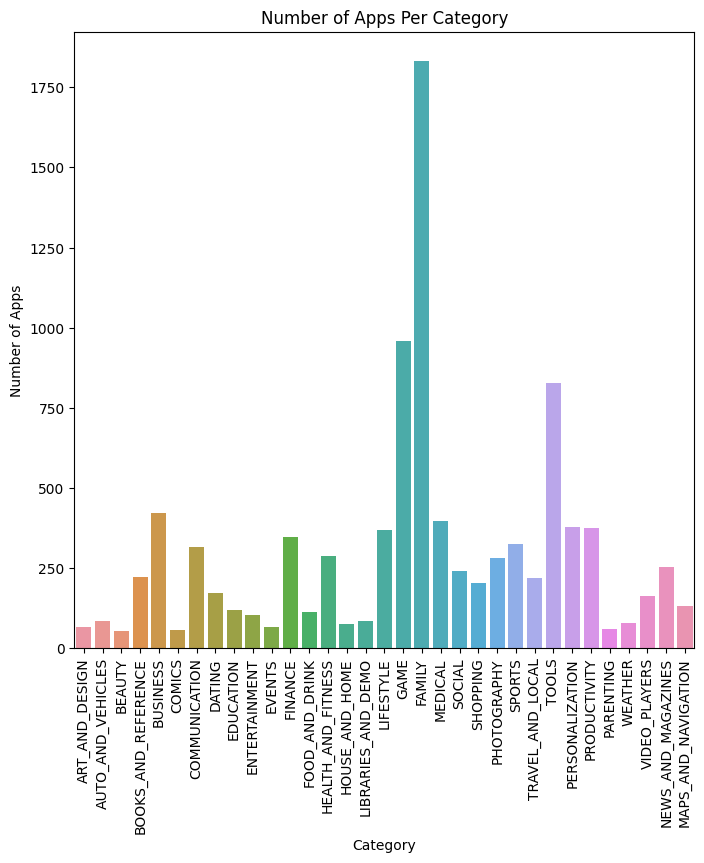

In [224]:
#plotting the number of applications of each category as bar graph
plt.figure(figsize=(8,8))
sns.countplot(x='Category', data=play_store_df)
plt.title('Number of Apps Per Category')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

# **Finding**

* In Above chart we see that FAMILY,GAME &TOOLS categories have highest number of applications present.

#**Data Exploration--Univariate & Bivariate Analysis**
**Pair plot** is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Plot a pairwise plot between all the quantitative variables to look for any evident patterns or relationships between the features

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Pairwise Plot - Rating, Size, Installs, Reviews, Price')

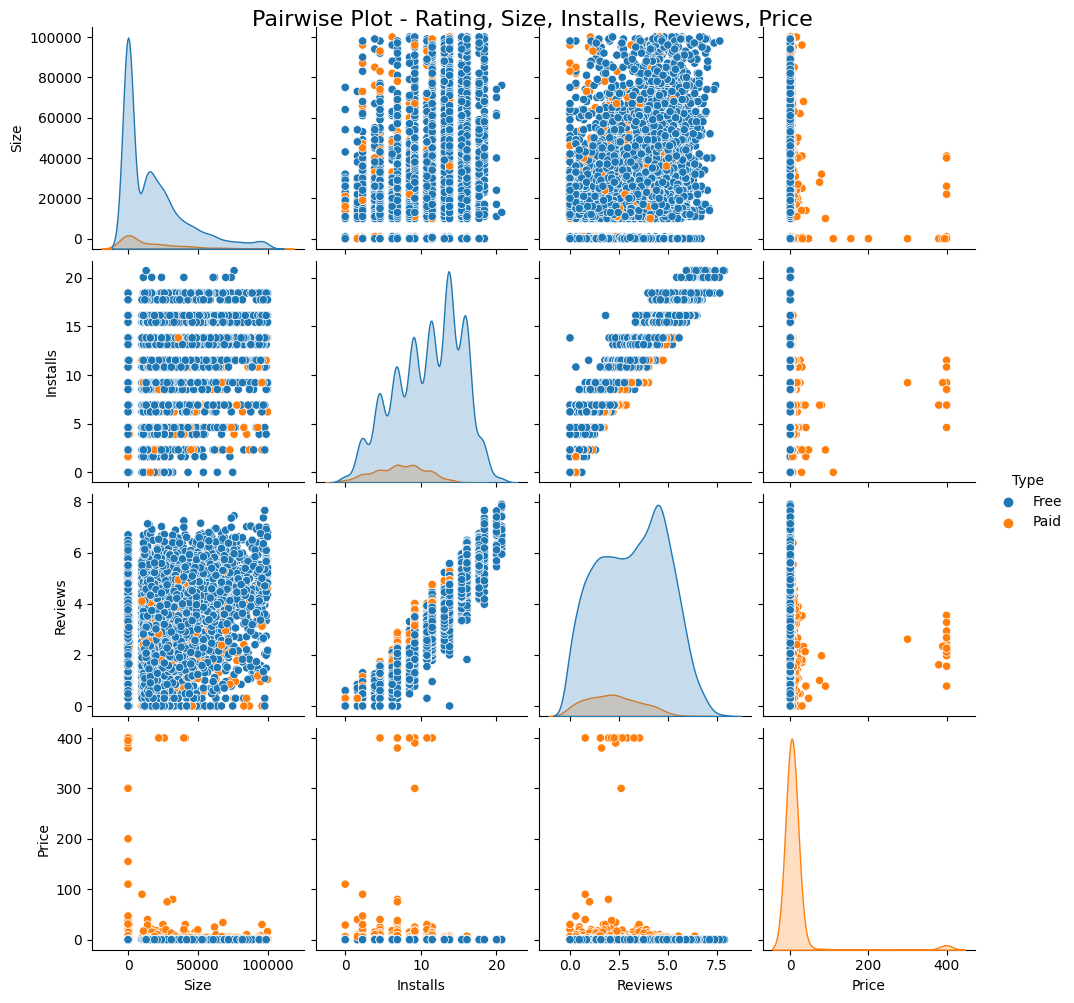

In [158]:
Rating = play_store_df['Rating']
Size = play_store_df['Size']
Installs = play_store_df['Installs']
Reviews = play_store_df['Reviews']
Type = play_store_df['Type']
Price = play_store_df['Price']

p = sns.pairplot(pd.DataFrame(list(zip(Rating, Size, np.log(Installs), np.log10(Reviews), Price, Type)),
                        columns=['Rating','Size', 'Installs', 'Reviews', 'Price','Type']), hue='Type')
p.fig.suptitle("Pairwise Plot - Rating, Size, Installs, Reviews, Price",x=0.5, y=1.0, fontsize=16)

**FINDINGS**
* Most of the App are Free.
* Most of the Paid Apps have Rating around 4
* As the number of installation increases the number of reviews of the particaular app also increases.
*Most of the Apps are light-weighted.

# **Correlation Dataframe**

In [159]:
play_store_df.corr()

<ipython-input-159-1c11de750a1f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  play_store_df.corr()


Reviews      Size  Installs     Price
Reviews   1.000000  0.176255  0.625165 -0.007598
Size      0.176255  1.000000  0.133997 -0.022134
Installs  0.625165  0.133997  1.000000 -0.009404
Price    -0.007598 -0.022134 -0.009404  1.000000

# **Correlation Heatmap **

<ipython-input-160-a55d53b762e4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(play_store_df.corr(), annot= True,cmap='coolwarm')


Text(0.5, 1.0, 'Corelation Heatmap for Playstore Data')

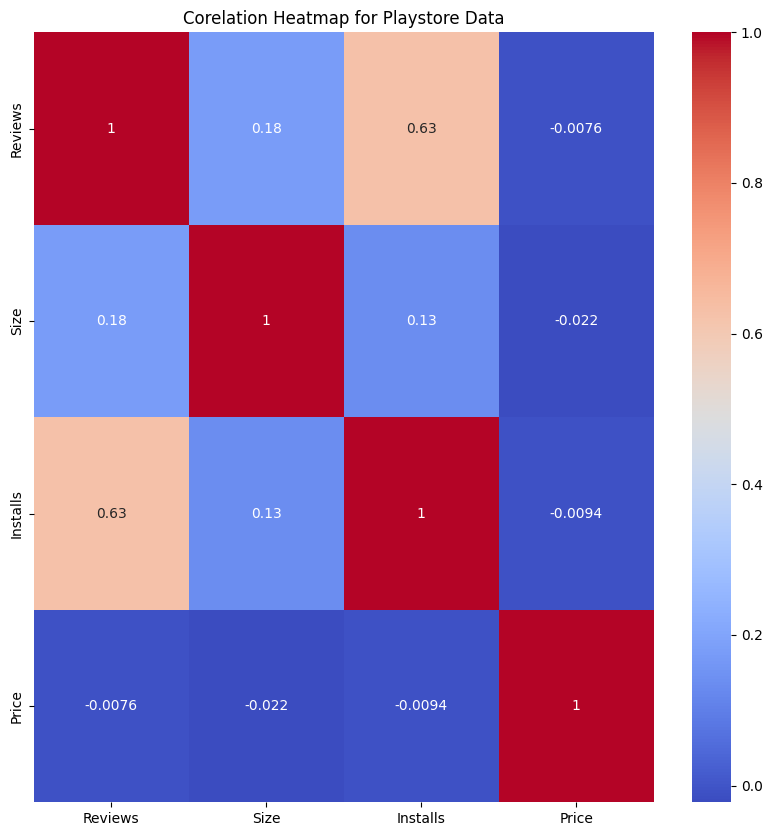

In [160]:
# Heat map for play_store
plt.figure(figsize = (10,10))
sns.heatmap(play_store_df.corr(), annot= True,cmap='coolwarm')
plt.title('Corelation Heatmap for Playstore Data')

* There is a strong positive correlation between the Reviews and Installs column. This is pretty much obvious. Higher the number of installs, higher is the user base, and higher are the total number of reviews dropped by the users.
* The` Price `is slightly negatively correlated with the `Rating, Reviews, and Installs.` This means that as the prices of the app increases, the average rating, total number of reviews and Installs fall slightly.
* The` Rating` is slightly positively correlated with the` Installs and Reviews` column. This indicates that as the the average user rating increases, the app installs and number of reviews also increase.

# **Let us check if there is any co-relation in both the dataframes.**

In [161]:
merged_df = pd.merge(play_store_df, user_review_df, on='App', how = "inner")

In [162]:
def merged_dfinfo():
  temp = pd.DataFrame(index=merged_df.columns)
  temp['data_type'] = merged_df.dtypes
  temp["count of non null values"] = merged_df.count()
  temp['NaN values'] = merged_df.isnull().sum()
  temp['% NaN values'] =merged_df.isnull().mean()
  temp['unique_count'] = merged_df.nunique()
  return temp
merged_dfinfo()

data_type  count of non null values  NaN values  \
App                             object                     61556           0   
Category                        object                     61556           0   
Rating                          object                     61556           0   
Reviews                        float64                     61556           0   
Size                           float64                     41150       20406   
Installs                       float64                     61556           0   
Type                            object                     61556           0   
Price                          float64                     61556           0   
Content Rating                  object                     61556           0   
Genres                          object                     61556           0   
Last Updated            datetime64[ns]                     61556           0   
Current Ver                     object                     61556           0   
Android Ver                     object                     61556           0   
Translated_Review               object                     61556           0   
Sentiment                       object                     61556           0   
Sentiment_Polarity             float64                     61556           0   
Sentiment_Subjectivity         float64                     61556           0   

                        % NaN values  unique_count  
App                         0.000000          1020  
Category                    0.000000            33  
Rating                      0.000000            23  
Reviews                     0.000000          1011  
Size                        0.331503           176  
Installs                    0.000000            13  
Type                        0.000000             2  
Price                       0.000000            14  
Content Rating              0.000000             5  
Genres                      0.000000            73  
Last Updated                0.000000           295  
Current Ver                 0.000000           589  
Android Ver                 0.000000            24  
Translated_Review           0.000000         26682  
Sentiment                   0.000000             3  
Sentiment_Polarity          0.000000          5295  
Sentiment_Subjectivity      0.000000          4382

# **Merged Dataframe Correlation**

In [163]:
merged_df.corr()

<ipython-input-163-5805580b1846>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_df.corr()


Reviews      Size  Installs     Price  \
Reviews                 1.000000  0.400155  0.441833 -0.021911   
Size                    0.400155  1.000000  0.230311  0.025882   
Installs                0.441833  0.230311  1.000000 -0.026538   
Price                  -0.021911  0.025882 -0.026538  1.000000   
Sentiment_Polarity     -0.066319 -0.123733 -0.042738  0.012694   
Sentiment_Subjectivity -0.009676  0.006449 -0.003840  0.003361   

                        Sentiment_Polarity  Sentiment_Subjectivity  
Reviews                          -0.066319               -0.009676  
Size                             -0.123733                0.006449  
Installs                         -0.042738               -0.003840  
Price                             0.012694                0.003361  
Sentiment_Polarity                1.000000                0.256052  
Sentiment_Subjectivity            0.256052                1.000000

# **Merged correlation Heatmap**

<ipython-input-165-275c5266760c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_df.corr(), annot= True, cmap='Greens')


Text(0.5, 1.0, ' Heatmap for merged Dataframe')

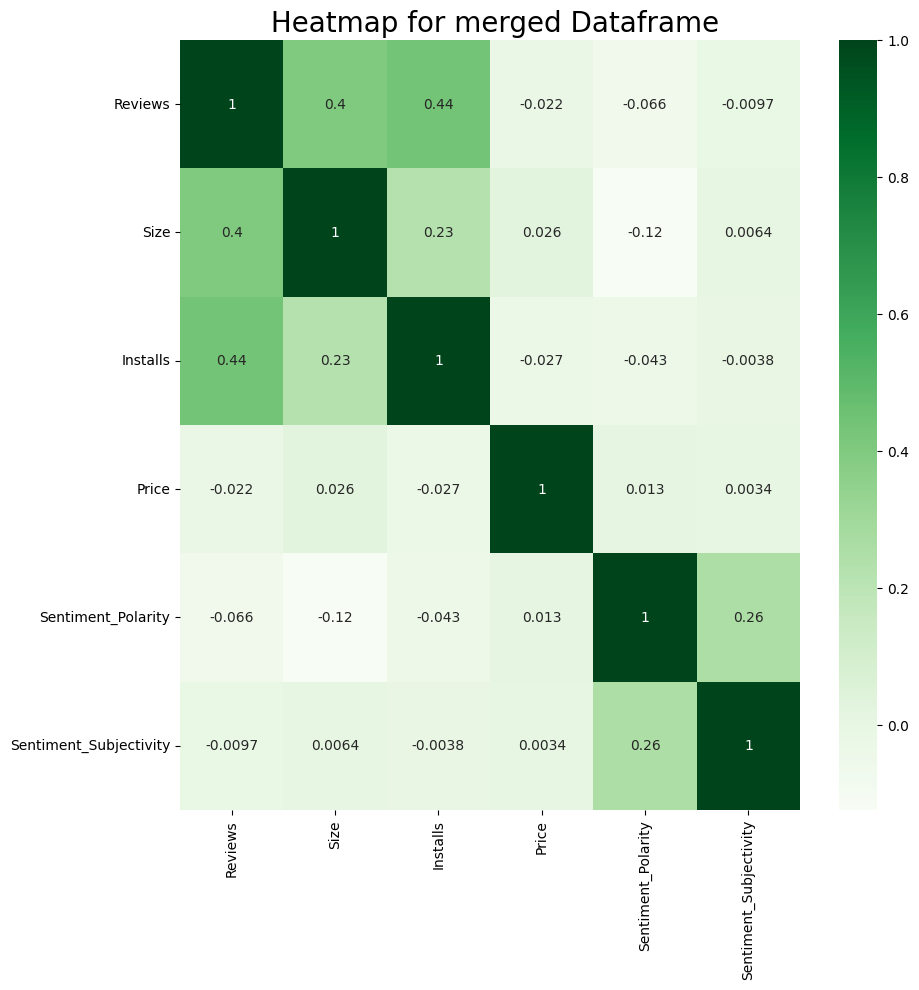

In [165]:
# Correlation heatmap
# Heat Map for the merged data frame
plt.figure(figsize = (10,10))
sns.heatmap(merged_df.corr(), annot= True, cmap='Greens')
plt.title(' Heatmap for merged Dataframe', size=20)

There is a strong positive correlation between the Reviews and Installs column. This is pretty much obvious. Higher the number of installs, higher is the user base, and higher are the total number of reviews dropped by the users.
* The` Price `is slightly negatively correlated with the `Rating, Reviews, and Installs.` This means that as the prices of the app increases, the average rating, total number of reviews and Installs fall slightly.
* There is a strong negetive correlation between the Size and Sentiment Polarity.

# **Drop all the null values from Sentiment and Translated_Review in the existing merged Dataframe**

In [166]:
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

In [167]:
merged_df.head()

App        Category Rating  Reviews     Size  Installs  \
0  Coloring book moana  ART_AND_DESIGN    3.9    967.0  14000.0  500000.0   
1  Coloring book moana  ART_AND_DESIGN    3.9    967.0  14000.0  500000.0   
2  Coloring book moana  ART_AND_DESIGN    3.9    967.0  14000.0  500000.0   
3  Coloring book moana  ART_AND_DESIGN    3.9    967.0  14000.0  500000.0   
4  Coloring book moana  ART_AND_DESIGN    3.9    967.0  14000.0  500000.0   

   Type  Price Content Rating                     Genres Last Updated  \
0  Free    0.0       Everyone  Art & Design;Pretend Play   2018-01-15   
1  Free    0.0       Everyone  Art & Design;Pretend Play   2018-01-15   
2  Free    0.0       Everyone  Art & Design;Pretend Play   2018-01-15   
3  Free    0.0       Everyone  Art & Design;Pretend Play   2018-01-15   
4  Free    0.0       Everyone  Art & Design;Pretend Play   2018-01-15   

  Current Ver   Android Ver  \
0       2.0.0  4.0.3 and up   
1       2.0.0  4.0.3 and up   
2       2.0.0  4.0.3 and up   
3       2.0.0  4.0.3 and up   
4       2.0.0  4.0.3 and up   

                                   Translated_Review Sentiment  \
0  A kid's excessive ads. The types ads allowed a...  Negative   
1                                         It bad >:(  Negative   
2                                               like   Neutral   
3                                               Good  Positive   
4                           I love colors inspyering  Positive   

   Sentiment_Polarity  Sentiment_Subjectivity  
0              -0.250                1.000000  
1              -0.725                0.833333  
2               0.000                0.000000  
3               0.150                0.514286  
4               0.500                0.600000

# **` What is the ratio of number of Paid apps and Free apps?`**


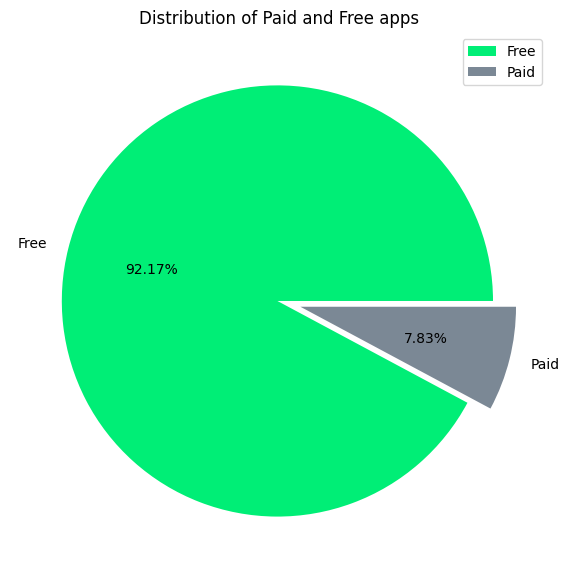

In [168]:
data = play_store_df['Type'].value_counts()
labels = ['Free', 'Paid']

# create pie chart
plt.figure(figsize=(7,7))
colors = ["#00EE76","#7B8895"]
explode=(0.01,0.1)
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',explode=explode)
plt.title('Distribution of Paid and Free apps')
plt.legend()

**Findings:**

From the above graph we can see that 92% of apps in google play store are free and 8%are paid.

## **`  Which category of Apps from the Content Rating column are found more on playstore ?`**

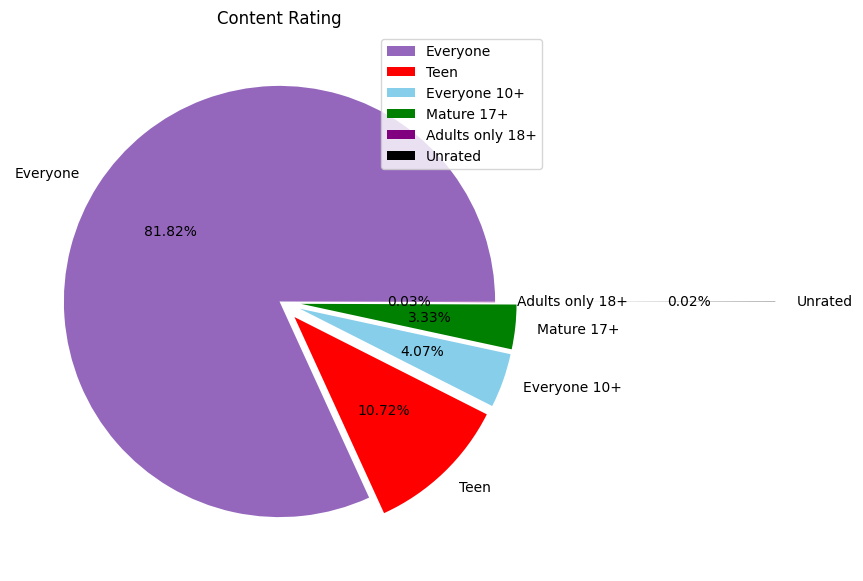

In [169]:
# Content rating of the apps
data = play_store_df['Content Rating'].value_counts()
labels = ['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+','Adults only 18+', 'Unrated']

#create pie chart
plt.figure(figsize=(7,7))
explode=(0,0.1,0.1,0.1,0.0,1.3)
colors = ['C4', 'red', 'skyblue', 'green', 'purple', 'black']
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',explode=explode)
plt.title('Content Rating')
plt.legend()

A majority of the apps (82%) in the play store are can be used by everyone.The remaining apps have various age restrictions to use it.

## **`Top categories on Google Playstore?`**

In [170]:
play_store_df.groupby("Category")["App"].count().sort_values(ascending= False)

Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: App, dtype: int64

In [171]:
x = play_store_df['Category'].value_counts()
y = play_store_df['Category'].value_counts().index
x_list = []
y_list = []
for i in range(len(x)):
    x_list.append(x[i])
    y_list.append(y[i])

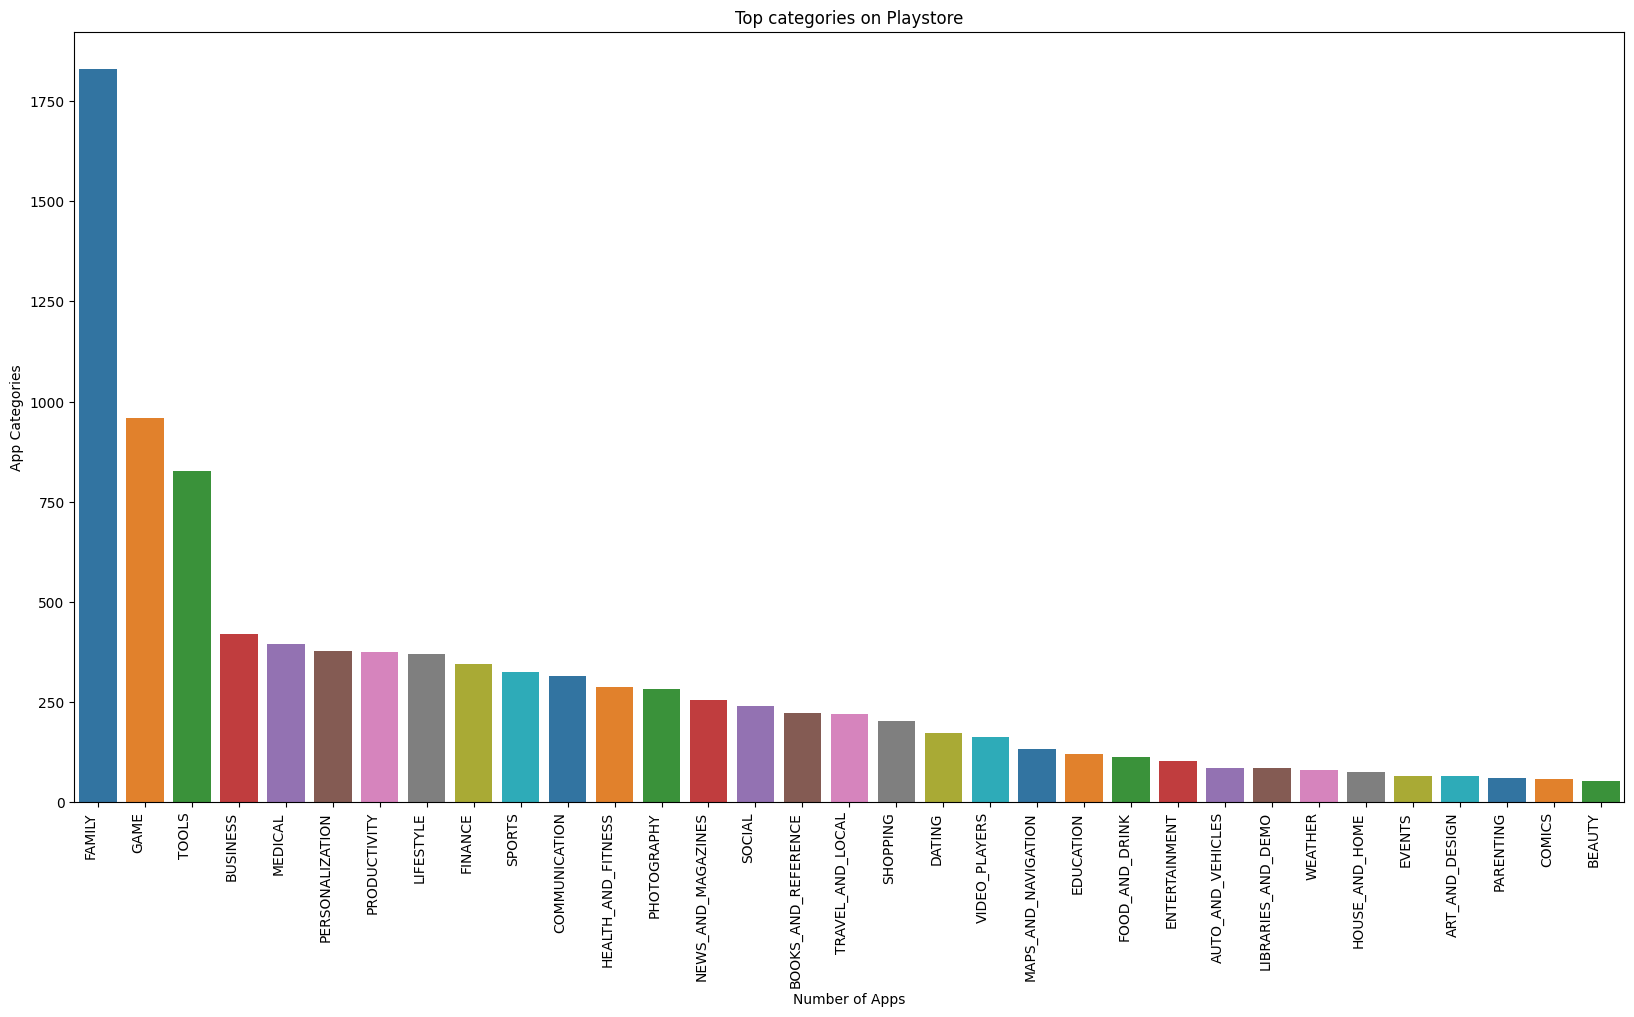

In [172]:
#Number of apps belonging to each category in the playstore
plt.figure(figsize=(20,10))
plt.xlabel('Number of Apps')
plt.ylabel('App Categories')
graph = sns.barplot(y = x_list, x = y_list, palette= "tab10")
graph.set_title("Top categories on Playstore")
graph.set_xticklabels(graph.get_xticklabels(), rotation= 90, horizontalalignment='right',);

**Findings:**

So there are all total 33 categories in the dataset From the above output we can come to a conclusion that in playstore most of the apps are under` FAMILY & GAME` category and least are of `BEAUTY` Category.


### **` Which category App's have most number of installs?`**

Text(0.5, 1.0, 'Total app installs in each category')

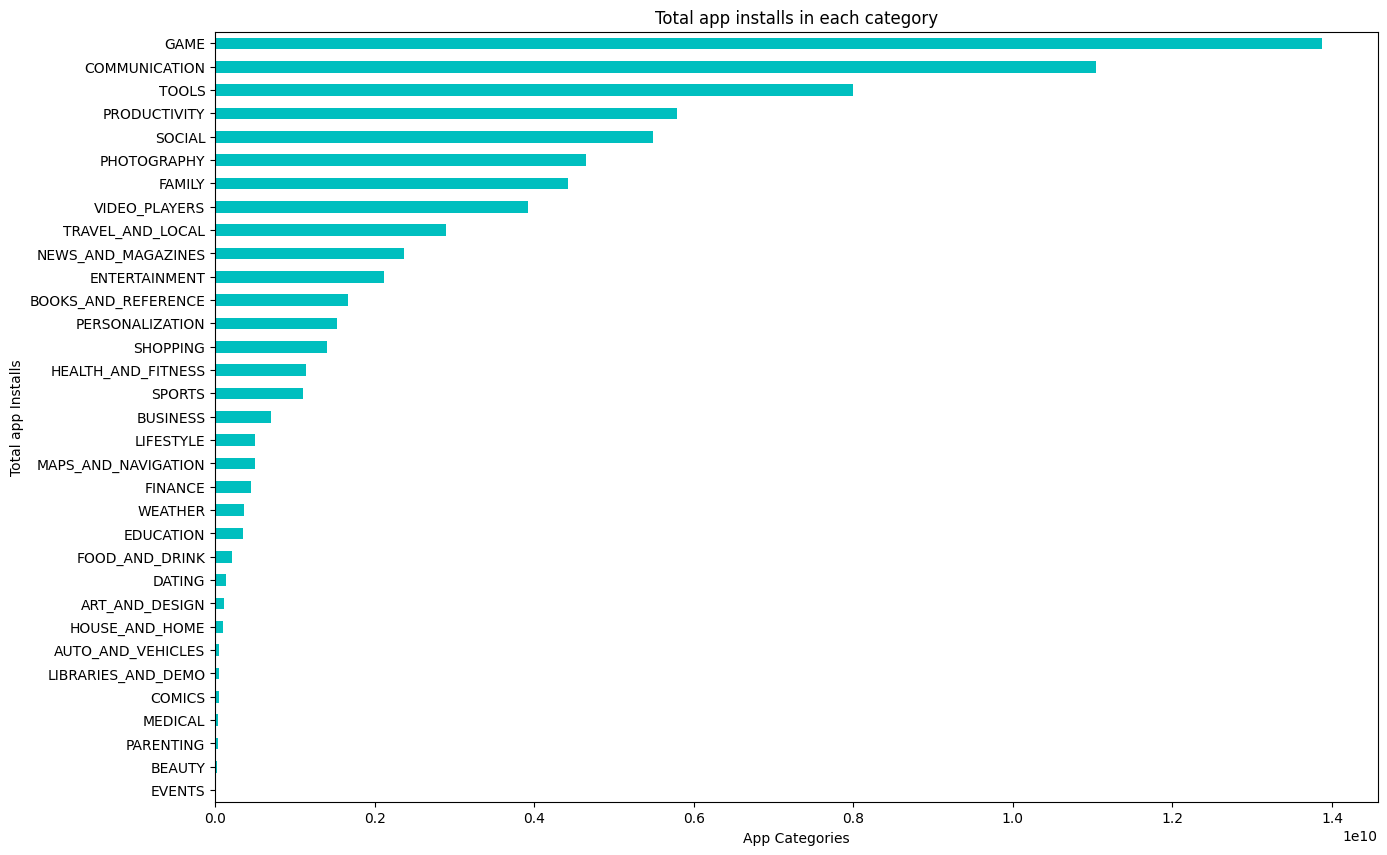

In [173]:
# total app installs in each category of the play store

a = play_store_df.groupby(['Category'])['Installs'].sum().sort_values()
a.plot.barh(figsize=(15,10), color = 'c')
plt.ylabel('Total app Installs')
plt.xlabel('App Categories')
plt.xticks()
plt.title('Total app installs in each category')

**Findings:**

This tells us the category of apps that has the maximum number of installs. The `Game,` `Communication and Tools` categories has the highest number of installs compared to other categories of apps.

### **` Average rating of the apps`**

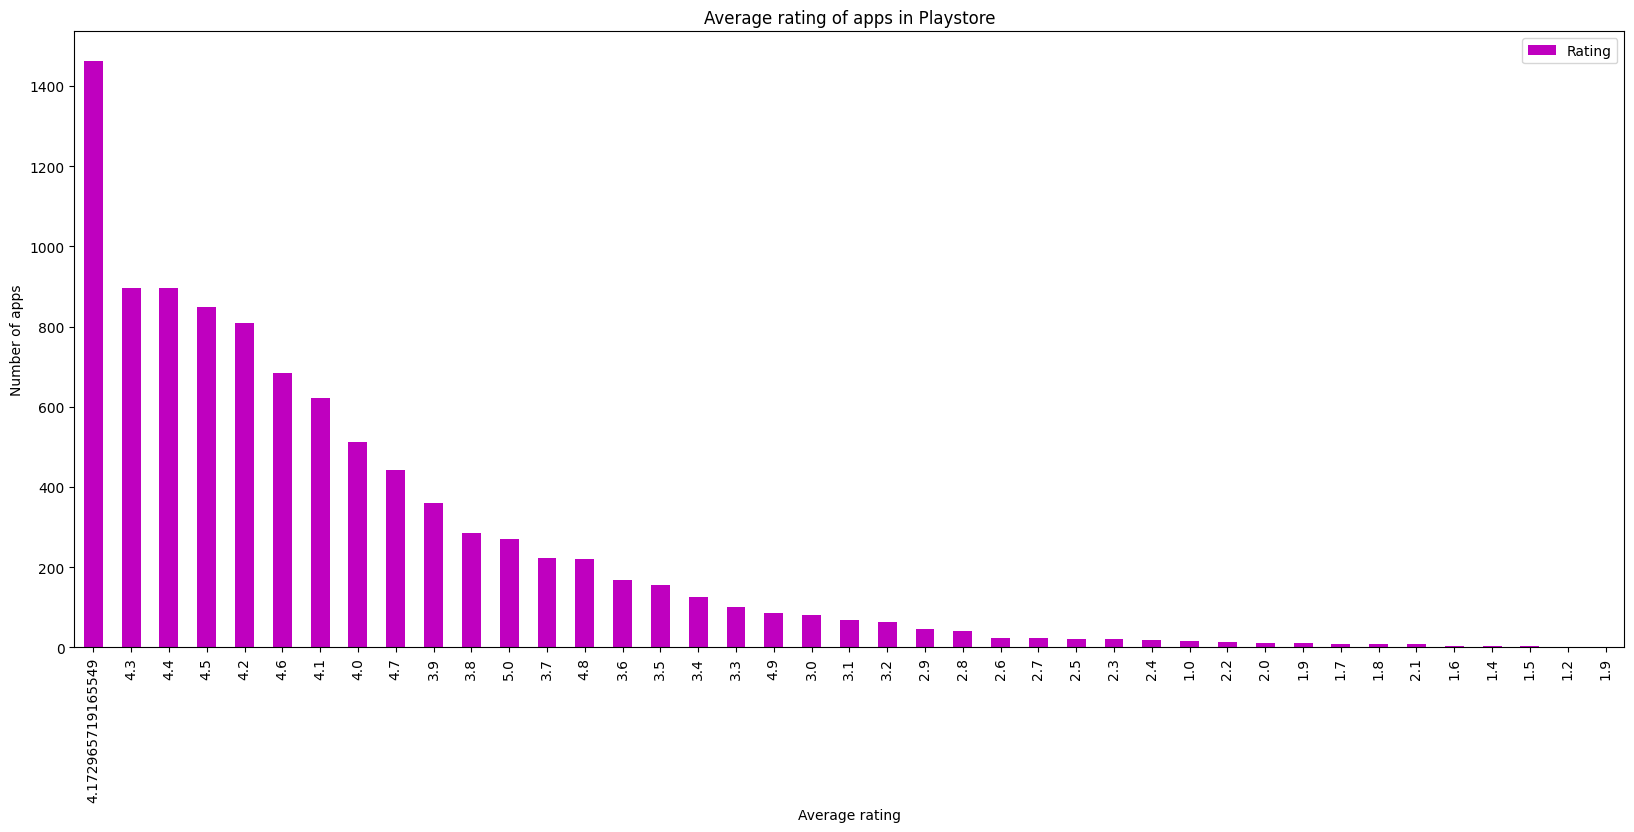

In [174]:
# Average app ratings

play_store_df['Rating'].value_counts().plot.bar(figsize=(20,8), color = 'm' )
plt.xlabel('Average rating')
plt.ylabel('Number of apps')
plt.title('Average rating of apps in Playstore')
plt.legend()

We can represent the ratings in a better way if we group the ratings between certain intervals. Here, we can group the rating as follows:

* 4-5: Top rated
* 3-4: Above average
* 2-3: Average
* 1-2: Below average

### **` What are the Top 10 installed apps in any category?`**

In [175]:
def findtop10incategory(str):
    str = str.upper()
    top10 = play_store_df[play_store_df['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    plt.figure(figsize=(15,6))
    plt.title('Top 10 Installed Apps')
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs, palette= "icefire")
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right')

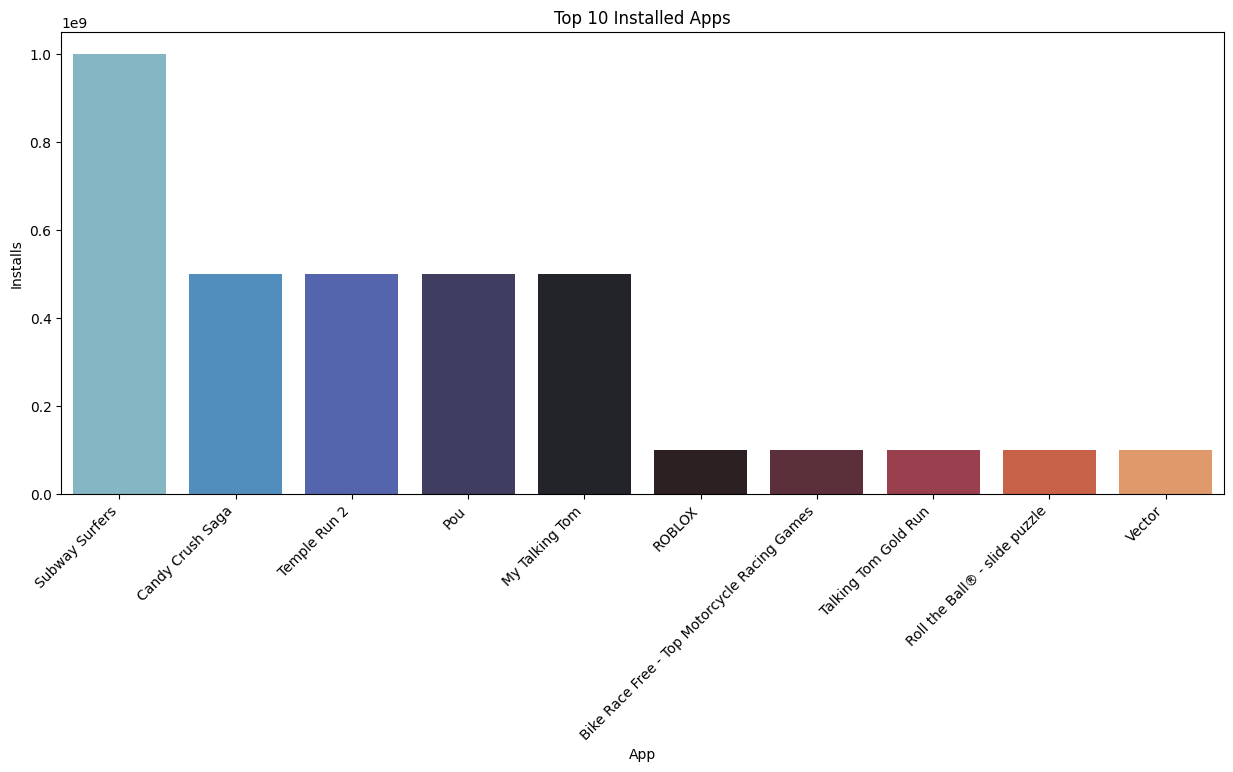

In [80]:
findtop10incategory('GAME')

**Findings:**

From the above graph we can see that in the **`Game category Subway Surfers,Candy Crush Saga, Temple Run 2`** has the highest installs. In the same way we by passing different category names to the function, we can get the top 10 installed apps.

### **` Top apps that are of free type.`**


In [177]:
 # Creating a df for only free apps

 free_df = play_store_df[play_store_df['Type'] == 'Free']

In [176]:
# Creating a df for top free apps

top_free_df = free_df[free_df['Installs'] == free_df['Installs'].max()]
top10free_apps=top_free_df.nlargest(10, 'Installs', keep='first')
top10free_apps.head(10)

App             Category Rating  \
152                          Google Play Books  BOOKS_AND_REFERENCE    3.9   
335   Messenger ‚Äì Text and Video Chat for Free        COMMUNICATION    4.0   
336                         WhatsApp Messenger        COMMUNICATION    4.4   
338               Google Chrome: Fast & Secure        COMMUNICATION    4.3   
340                                      Gmail        COMMUNICATION    4.3   
341                                   Hangouts        COMMUNICATION    4.0   
391              Skype - free IM & video calls        COMMUNICATION    4.1   
865                          Google Play Games        ENTERTAINMENT    4.3   
1654                            Subway Surfers                 GAME    4.5   
2544                                  Facebook               SOCIAL    4.1   

         Reviews     Size      Installs  Type  Price Content Rating  \
152    1433233.0      NaN  1.000000e+09  Free    0.0           Teen   
335   56642847.0      NaN  1.000000e+09  Free    0.0       Everyone   
336   69119316.0      NaN  1.000000e+09  Free    0.0       Everyone   
338    9642995.0      NaN  1.000000e+09  Free    0.0       Everyone   
340    4604324.0      NaN  1.000000e+09  Free    0.0       Everyone   
341    3419249.0      NaN  1.000000e+09  Free    0.0       Everyone   
391   10484169.0      NaN  1.000000e+09  Free    0.0       Everyone   
865    7165362.0      NaN  1.000000e+09  Free    0.0           Teen   
1654  27722264.0  76000.0  1.000000e+09  Free    0.0   Everyone 10+   
2544  78158306.0      NaN  1.000000e+09  Free    0.0           Teen   

                 Genres Last Updated Current Ver Android Ver  
152   Books & Reference   2018-08-03         1.0  4.1 and up  
335       Communication   2018-08-01         1.0  4.1 and up  
336       Communication   2018-08-03         1.0  4.1 and up  
338       Communication   2018-08-01         1.0  4.1 and up  
340       Communication   2018-08-02         1.0  4.1 and up  
341       Communication   2018-07-21         1.0  4.1 and up  
391       Communication   2018-08-03         1.0  4.1 and up  
865       Entertainment   2018-07-16         1.0  4.1 and up  
1654             Arcade   2018-07-12      1.90.0  4.1 and up  
2544             Social   2018-08-03         1.0  4.1 and up

In [178]:
# Top free apps

top_free_df['App']

152                            Google Play Books
335     Messenger ‚Äì Text and Video Chat for Free
336                           WhatsApp Messenger
338                 Google Chrome: Fast & Secure
340                                        Gmail
341                                     Hangouts
391                Skype - free IM & video calls
865                            Google Play Games
1654                              Subway Surfers
2544                                    Facebook
2545                                   Instagram
2554                                     Google+
2808                               Google Photos
3117                   Maps - Navigate & Explore
3127                          Google Street View
3234                                      Google
3454                                Google Drive
3665                                     YouTube
3687                     Google Play Movies & TV
3736                                 Google News
Name: App, dtype: 

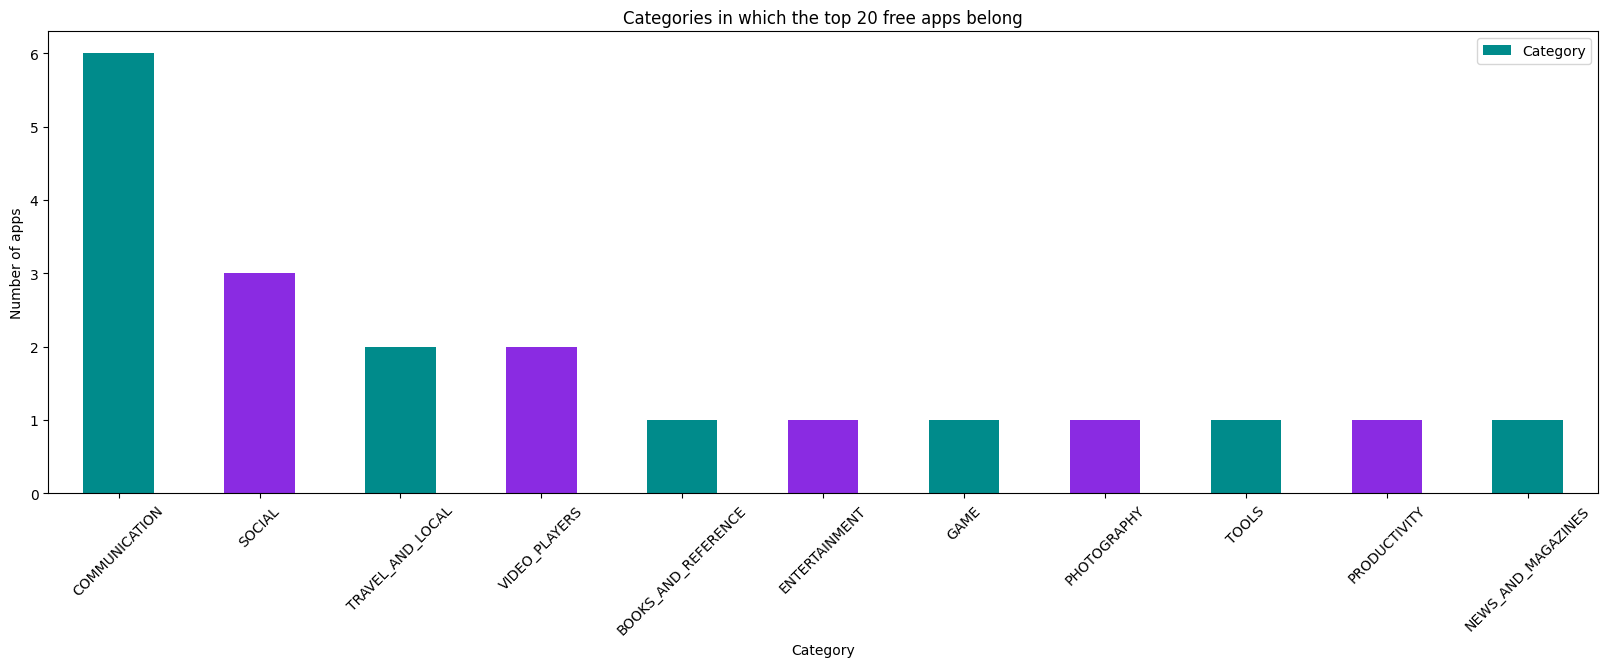

In [180]:
# Categories in which the top 20 free apps belong to
top_free_df['Category'].value_counts().plot.bar(figsize=(20,6), color= ('darkcyan','blueviolet'))
plt.xlabel('Category')
plt.ylabel('Number of apps')
plt.title('Categories in which the top 20 free apps belong')
plt.xticks(rotation=45)
plt.legend()


### **` Top apps that are of paid type.`**

In [181]:
# Creating a df containing only paid apps
paid_df=play_store_df[play_store_df['Type']=='Paid']

<Axes: xlabel='Price'>

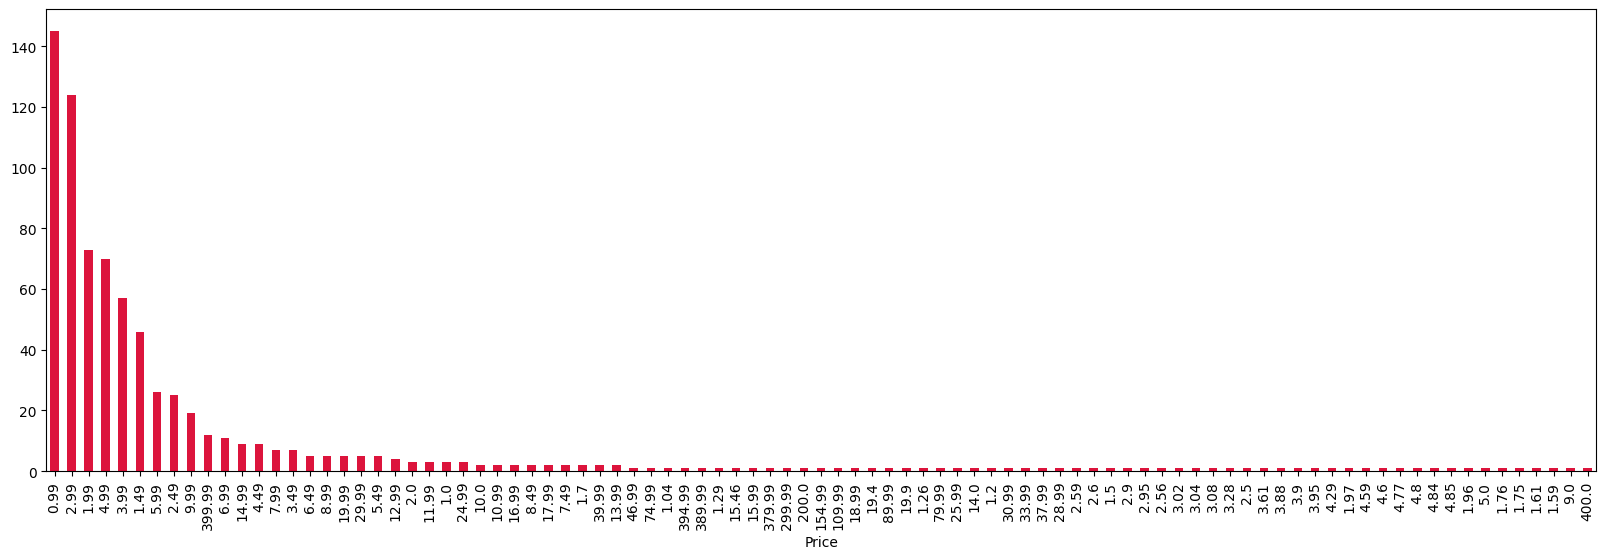

In [182]:
# Number of apps that can be installed at a particular price

paid_df.groupby('Price')['App'].count().sort_values(ascending= False).plot.bar(figsize = (20,6), color = 'crimson')

* The paid apps charge the users a certain amount to download and install the app. This amount varies from one app to another.
* There are a lot of apps that charge a small amount whereas some apps charge a larger amount. In this case the price to download an app varies from USD 0.99 to USD 400.
* In order to select the top paid apps, it won't be fair to look just into the numer of installs. This is because the apps that charge a lower installation fee will be installed by more number of people in general.
* Here a better way to determine the top apps in the paid category is by finding the revenue it generated through app installs.
* This is given by:

 Revenue generated through installs = (Number of installs)x(Price to install the app)


**Lets define a new column Revenue in paid_df which gives the revenue generated by the app through installs alone.**

In [183]:
# Creatng a new column 'Revenue' in paid_df
paid_df['Revenue'] = paid_df['Installs']*paid_df['Price']
paid_df.head()

<ipython-input-183-83cf897b5afd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_df['Revenue'] = paid_df['Installs']*paid_df['Price']


App       Category Rating  \
234  TurboScan: scan documents and receipts in PDF       BUSINESS    4.7   
235                 Tiny Scanner Pro: PDF Doc Scan       BUSINESS    4.8   
427                             Puffin Browser Pro  COMMUNICATION    4.0   
476                      Moco+ - Chat, Meet People         DATING    4.2   
477                                     Calculator         DATING    2.6   

     Reviews     Size  Installs  Type  Price Content Rating         Genres  \
234  11442.0      6.8  100000.0  Paid   4.99       Everyone       Business   
235  10295.0  39000.0  100000.0  Paid   4.99       Everyone       Business   
427  18247.0      NaN  100000.0  Paid   3.99       Everyone  Communication   
476   1545.0      NaN   10000.0  Paid   3.99     Mature 17+         Dating   
477     57.0      6.2    1000.0  Paid   6.99       Everyone         Dating   

    Last Updated  Current Ver Android Ver   Revenue  
234   2018-03-25        1.5.2  4.0 and up  499000.0  
235   2017-04-11        3.4.6  3.0 and up  499000.0  
427   2018-07-05  7.5.3.20547  4.1 and up  399000.0  
476   2018-06-19      2.6.139  4.1 and up   39900.0  
477   2017-10-25        1.1.6  4.0 and up    6990.0

In [184]:
# Top app in the paid category

paid_df[paid_df['Revenue'] == paid_df['Revenue'].max()]

App Category Rating    Reviews  Size    Installs  Type  Price  \
2241  Minecraft   FAMILY    4.5  2376564.0   NaN  10000000.0  Paid   6.99   

     Content Rating                     Genres Last Updated Current Ver  \
2241   Everyone 10+  Arcade;Action & Adventure   2018-07-24     1.5.2.1   

     Android Ver     Revenue  
2241  4.1 and up  69900000.0

# **Distribution of apps based on its size**


**Lets create a function to create the size intervals**

In [185]:
# Function to group the apps based on its size in MB

def size_apps(var):
  '''
  This function groups the size of an app
  between ~0 to 100 MB into certain intervals.
  '''
  try:
    if var < 1:
      return 'Below 1'
    elif var >= 1 and var <10:
      return '1-10'
    elif var >= 10 and var <20:
      return '10-20'
    elif var >= 20 and var <30:
      return '20-30'
    elif var >= 30 and var <40:
      return '30-40'
    elif var >= 40 and var <50:
      return '40-50'
    elif var >= 50 and var <60:
      return '50-60'
    elif var >= 60 and var <70:
      return '60-70'
    elif var >= 70 and var <80:
      return '70-80'
    elif var >= 80 and var <90:
      return '80-90'
    else:
      return '90 and above'
  except:
    return var

**Lets apply the `size_group` function on the Size column and store the results in a new column named `Size` group.**

In [186]:
play_store_df['size_group']=play_store_df['Size'].apply(lambda x : size_apps(x))
play_store_df.head()

App        Category Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN    4.1   
1                                Coloring book moana  ART_AND_DESIGN    3.9   
2  U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...  ART_AND_DESIGN    4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN    4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN    4.3   

    Reviews     Size    Installs  Type  Price Content Rating  \
0     159.0  19000.0     10000.0  Free    0.0       Everyone   
1     967.0  14000.0    500000.0  Free    0.0       Everyone   
2   87510.0      8.7   5000000.0  Free    0.0       Everyone   
3  215644.0  25000.0  50000000.0  Free    0.0           Teen   
4     967.0      2.8    100000.0  Free    0.0       Everyone   

                      Genres Last Updated Current Ver   Android Ver  \
0               Art & Design   2018-01-07       1.0.0  4.0.3 and up   
1  Art & Design;Pretend Play   2018-01-15       2.0.0  4.0.3 and up   
2               Art & Design   2018-08-01       1.2.4  4.0.3 and up   
3               Art & Design   2018-06-08         1.0    4.2 and up   
4    Art & Design;Creativity   2018-06-20         1.1    4.4 and up   

     size_group  
0  90 and above  
1  90 and above  
2          1-10  
3  90 and above  
4          1-10

# **Android version based on each category**

In [189]:
play_store_df.head()

App        Category Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN    4.1   
1                                Coloring book moana  ART_AND_DESIGN    3.9   
2  U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...  ART_AND_DESIGN    4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN    4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN    4.3   

    Reviews     Size    Installs  Type  Price Content Rating  \
0     159.0  19000.0     10000.0  Free    0.0       Everyone   
1     967.0  14000.0    500000.0  Free    0.0       Everyone   
2   87510.0      8.7   5000000.0  Free    0.0       Everyone   
3  215644.0  25000.0  50000000.0  Free    0.0           Teen   
4     967.0      2.8    100000.0  Free    0.0       Everyone   

                      Genres Last Updated Current Ver   Android Ver  \
0               Art & Design   2018-01-07       1.0.0  4.0.3 and up   
1  Art & Design;Pretend Play   2018-01-15       2.0.0  4.0.3 and up   
2               Art & Design   2018-08-01       1.2.4  4.0.3 and up   
3               Art & Design   2018-06-08         1.0    4.2 and up   
4    Art & Design;Creativity   2018-06-20         1.1    4.4 and up   

     size_group  
0  90 and above  
1  90 and above  
2          1-10  
3  90 and above  
4          1-10

Now I am going to group it to 1 till 8 version of android. Change the null value to 1.0.

Category        Android Ver 
ART_AND_DESIGN  4.1 and up      22
                4.0.3 and up    16
                2.3 and up       8
                4.0 and up       7
                4.2 and up       4
                                ..
WEATHER         4.2 and up       2
                1.6 and up       1
                2.3.3 and up     1
                3.0 and up       1
                4.3 and up       1
Name: Android Ver, Length: 496, dtype: int64


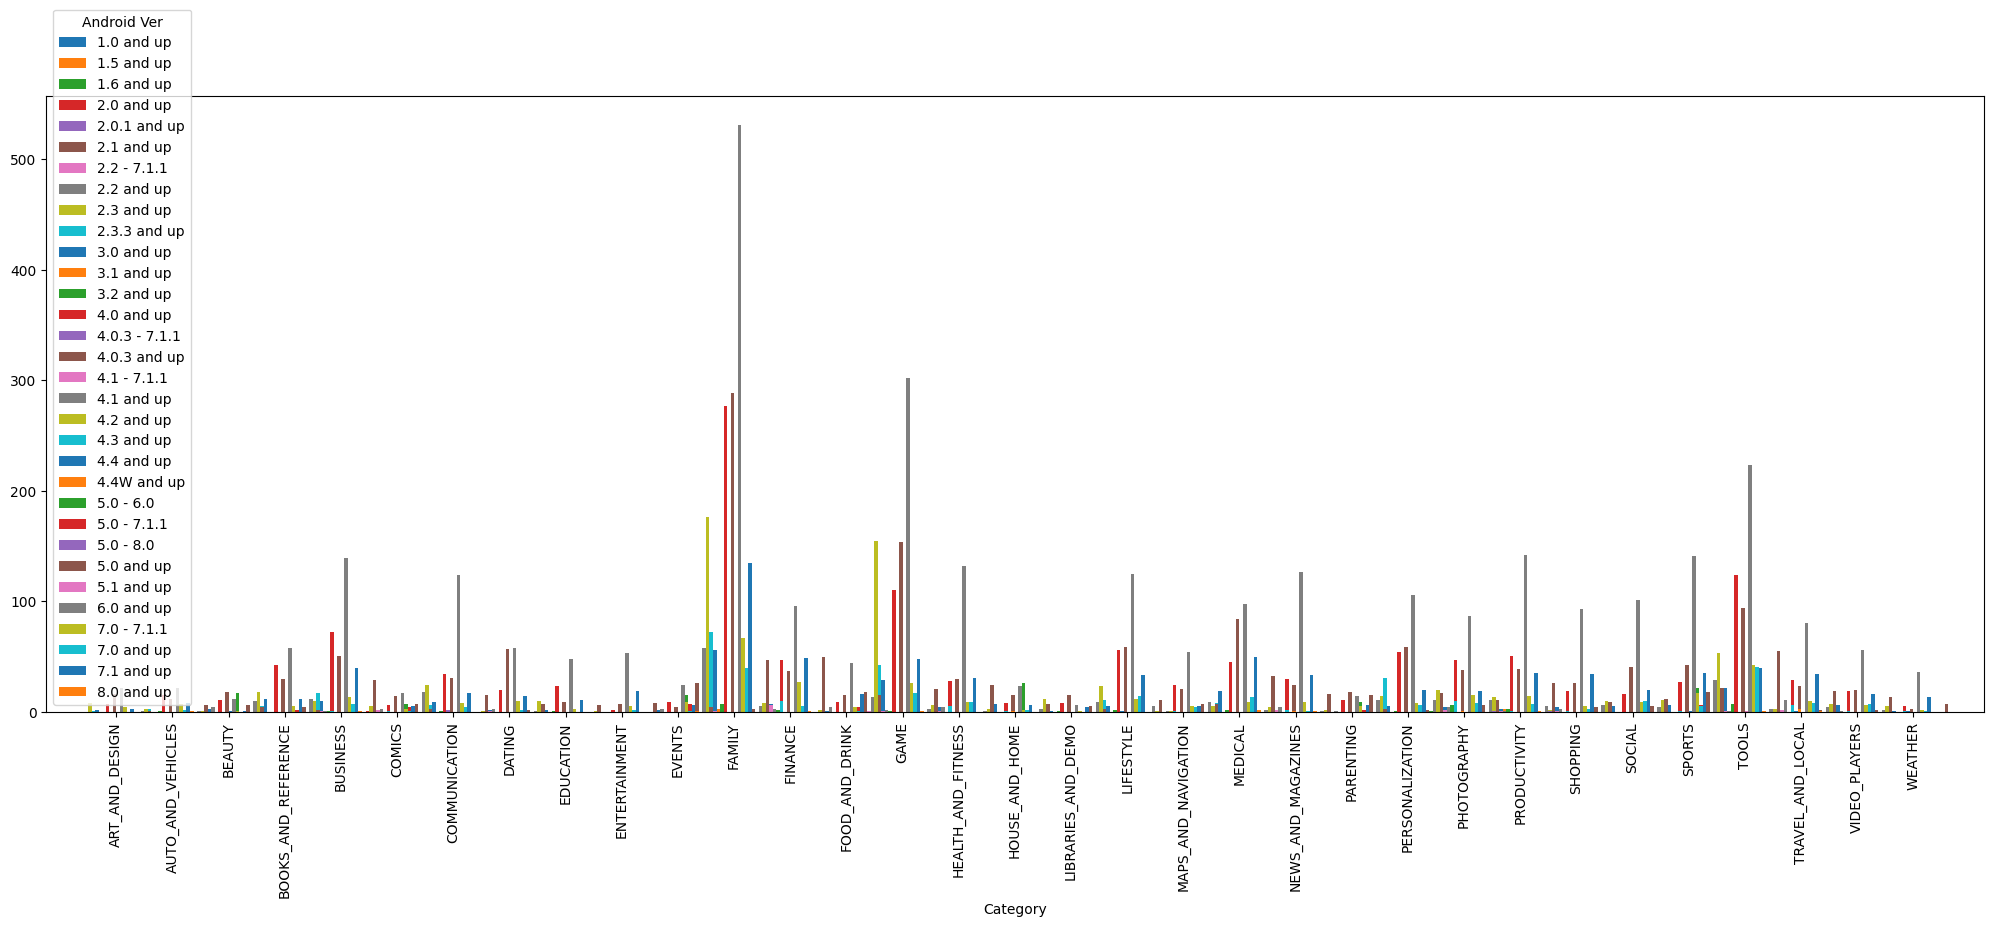

In [190]:
print(play_store_df.groupby('Category')['Android Ver'].value_counts())
Type_cat = play_store_df.groupby('Category')['Android Ver'].value_counts().unstack().plot.bar(figsize=(25,8), width=2)
plt.xticks()
plt.show()

**Findings:**

It is clearly evident from the above plot that majority of the apps are working on **`Android_Ver 4.0 and up`**.

# **Data Visualization on User Reviews:**
### **` Percentage of Review Sentiments`**

In [191]:
# Basic inspection
user_review_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

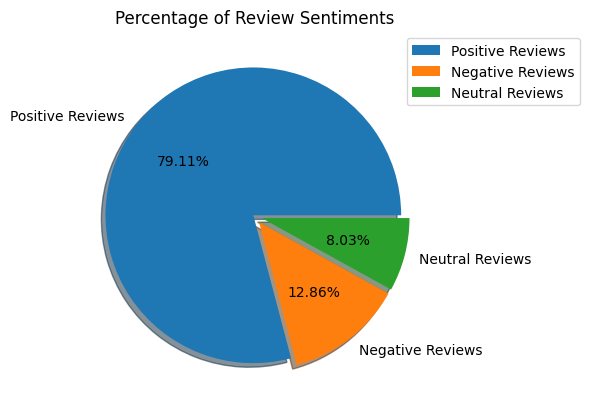

In [197]:
import matplotlib.pyplot as plt
counts = list(user_review_df['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negative Reviews','Neutral Reviews'
plt.pie(counts, labels=labels, explode=[0.01, 0.05, 0.05], shadow=True, autopct="%.2f%%")
plt.title('Percentage of Review Sentiments')
plt.legend(bbox_to_anchor=(0.9, 0, 0.5, 1))
plt.show()

**Findings:**

1. Positive reviews are **79.11%**
2. Negative reviews are **12.86%**
3. Neutral reviews are **8.03%**

### **` Apps with the highest number of positive reviews`**

In [199]:
# positive reviews
positive_ur_df=user_review_df[user_review_df['Sentiment']=='Positive']
positive_ur_df.head(10)

App                                  Translated_Review  \
0   10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1   10 Best Foods for You    This help eating healthy exercise regular basis   
2   10 Best Foods for You                                               Good   
3   10 Best Foods for You         Works great especially going grocery store   
4   10 Best Foods for You                                       Best idea us   
5   10 Best Foods for You                                           Best way   
6   10 Best Foods for You                                            Amazing   
7   10 Best Foods for You                                               Good   
10  10 Best Foods for You                                          good you.   
11  10 Best Foods for You  Useful information The amount spelling errors ...   

   Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0   Positive                1.00                0.533333  
1   Positive                0.25                0.288462  
2   Positive                0.15                0.514286  
3   Positive                0.40                0.875000  
4   Positive                1.00                0.300000  
5   Positive                1.00                0.300000  
6   Positive                0.60                0.900000  
7   Positive                0.15                0.514286  
10  Positive                0.70                0.600000  
11  Positive                0.20                0.100000

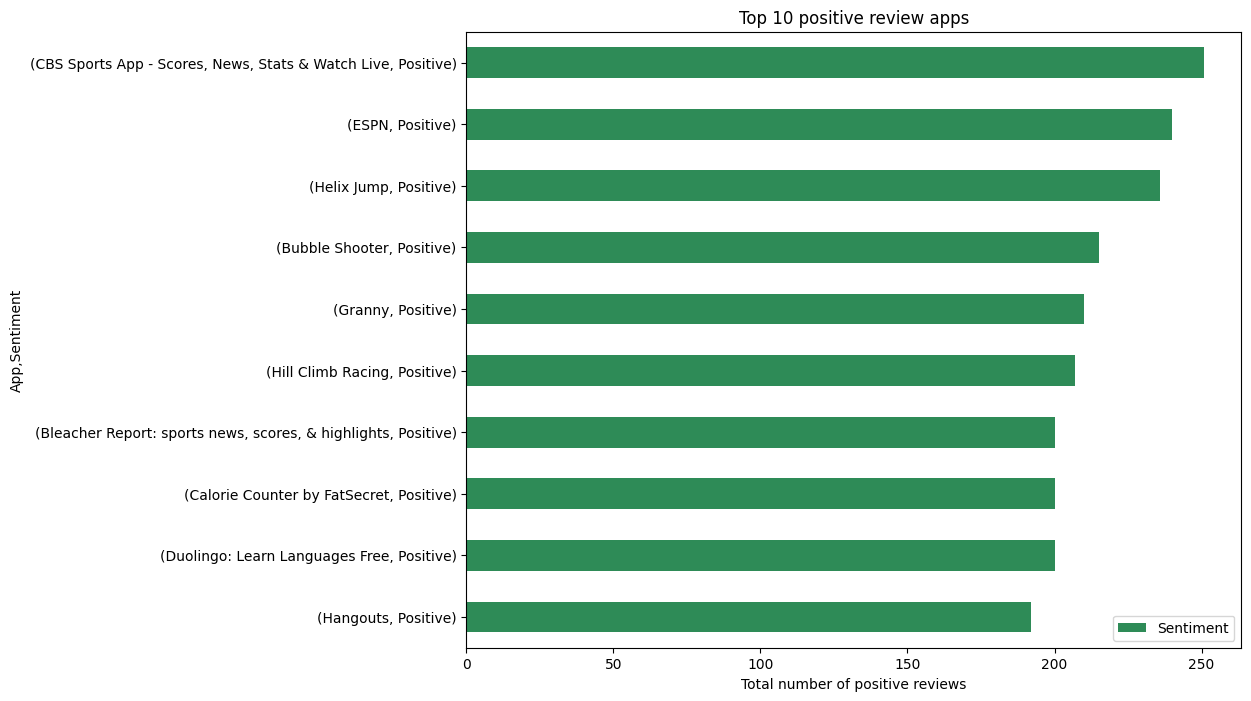

In [200]:
positive_ur_df.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(10,8),color='seagreen').invert_yaxis()
plt.title("Top 10 positive review apps")
plt.xlabel('Total number of positive reviews')
plt.legend()

# **Findings**

* Highest positive review apps are CBS sports app,ESPN,Helix jump etc.

### **` Apps with the highest number of negative reviews.`**

In [201]:
negative_ur_df=user_review_df[user_review_df['Sentiment']=='Negative']
negative_ur_df.head(10)

App                                  Translated_Review  \
32   10 Best Foods for You                 No recipe book Unable recipe book.   
43   10 Best Foods for You  Waste time It needs internet time n ask calls ...   
68   10 Best Foods for You                            Faltu plz waste ur time   
85   10 Best Foods for You                                  Crap Doesn't work   
95   10 Best Foods for You  Boring. I thought actually just texts that's i...   
132  10 Best Foods for You                 No recipe book Unable recipe book.   
143  10 Best Foods for You  Waste time It needs internet time n ask calls ...   
168  10 Best Foods for You                            Faltu plz waste ur time   
185  10 Best Foods for You                                  Crap Doesn't work   
195  10 Best Foods for You  Boring. I thought actually just texts that's i...   

    Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
32   Negative              -0.500                   0.500  
43   Negative              -0.200                   0.000  
68   Negative              -0.200                   0.000  
85   Negative              -0.800                   0.800  
95   Negative              -0.325                   0.475  
132  Negative              -0.500                   0.500  
143  Negative              -0.200                   0.000  
168  Negative              -0.200                   0.000  
185  Negative              -0.800                   0.800  
195  Negative              -0.325                   0.475

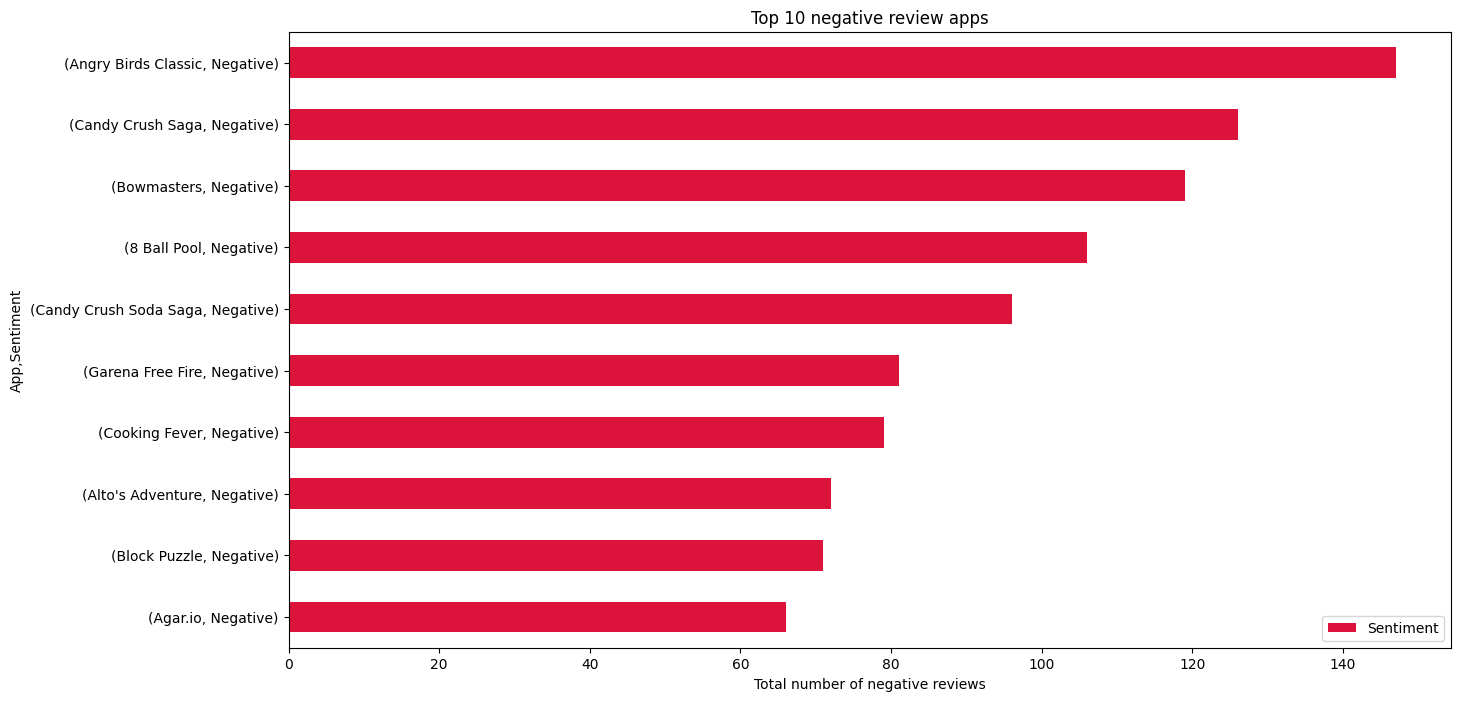

In [202]:
negative_ur_df.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(15,8),color='crimson').invert_yaxis()
plt.title("Top 10 negative review apps")
plt.xlabel('Total number of negative reviews')
plt.legend()

# **Findings**

* Highest negetive review apps are Angry Bird Classic,Candy Crush Saga,Bowmasters etc.

### **` Histogram of Subjectivity`**

In [203]:
merged_df.Sentiment_Subjectivity.value_counts()

0.514286    25625
0.000000     4139
1.000000     1653
0.500000     1579
0.600000     1133
            ...  
0.765000        1
0.508052        1
0.454167        1
0.417316        1
0.545714        1
Name: Sentiment_Subjectivity, Length: 4382, dtype: int64

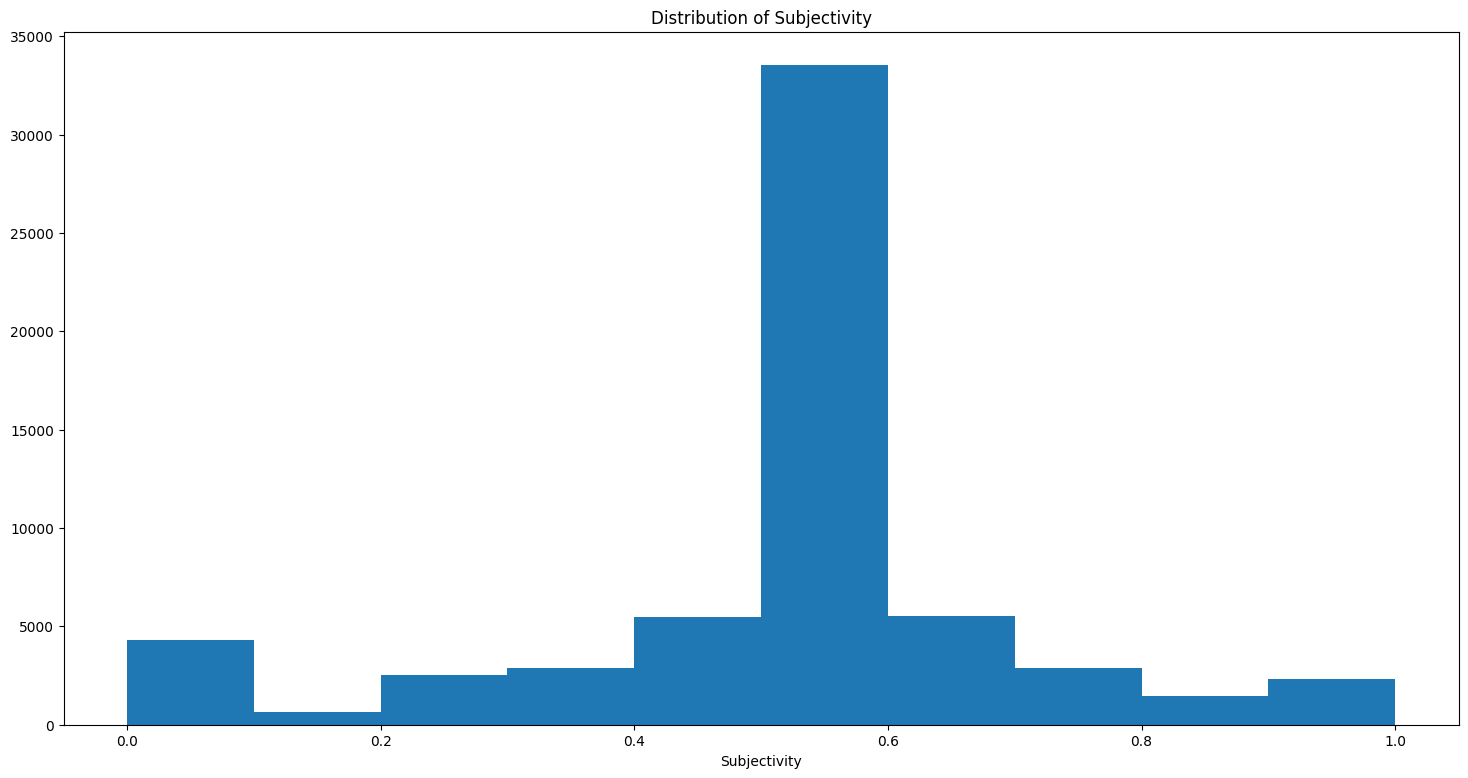

In [209]:
plt.figure(figsize=(18,9))
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(merged_df[merged_df['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'])
plt.show()

 **Findings:**

**`0 - objective(fact), 1 - subjective(opinion)`**

It can be seen that maximum number of sentiment subjectivity lies between 0.4 to 0.7. From this we can conclude that maximum number of users give reviews to the applications, according to their experience.

# **Conclusion :**

**1.Rating**

Most of the apps have rating in between 4 and 5.

Most numbers of apps are rated at 4.3

Categories of apps have more than 4 average rating.item

 **2.Size**

Maximum number of applications present in the dataset are of small size.

**3.Installs**

Majority of the apps come into these three categories, Family, Game, and Tools.

Maximum number of apps present in google play store come under Family, Game and tools but as per the installation and requirement in the market plot, scenario is not the same. Maximum installed apps comes under Game, Communication, Productivity and Social.

Subway Surfers, Facebook, Messenger and Google Drive are the most installed apps.

**4.Type(Free/Paid)**

About 92% apps are free and 8% apps are of paid type.

The category ‚ÄòFamily‚Äô has the highest number of paid apps.

Free apps are installed more than paid apps.

The app ‚ÄúI‚Äôm Rich ‚Äî Trump Edition‚Äù from the category ‚ÄòLifestyle‚Äô is the most costly app priced at $400

**5.Content Rating**

Content having Everyone only has most installs, while unrated and Adults only 18+ have less installs.

**6.Reviews**

Number of installs is positively correlated with reviews with correlation 0.64.
Sentiment Analysis

**7.Sentiment**

Most of the reviews are of Positive Sentiment, while Negative and Neutral have low number of reviews.

**8.Sentiment Polarity / Sentiment Subjectivity**

Collection of reviews shows a wide range of subjectivity and most of the reviews fall in [-0.50,0.75] polarity scale implying that the extremely negative or positive sentiments are significantly low.
Most of the reviews show a mid-range of negative and positive sentiments.

Sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of case, shows a proportional behavior, when variance is too high or low.
